## US Housing Market 2006 to 2010

The goal of this project is to analyze the US housing market from 2006 to 2010. It is based on a dataset from Ames, Iowa.

The following variables are available in the dataset at hand:

| Data Category | Description |
| :------- | :------- |
| SalePrice | The property's sale price in dollars. This is the target variable that you're trying to predict |
| MSSubClass | The building class |
| MSZoning | The general zoning classification |
| LotFrontage | Linear feet of street connected to property |
| LotArea | Lot size in square feet |
| Street | Type of road access |
| Alley | Type of alley access |
| LotShape | General shape of property |
| LandContour | Flatness of the property |
| Utilities | Type of utilities available |
| LotConfig | Lot configuration |
|LandSlope | Slope of property |
|Neighborhood | Physical locations within Ames city limits |
|Condition1 | Proximity to main road or railroad |
|Condition2 | Proximity to main road or railroad (if a second is present) |
|BldgType | Type of dwelling |
|HouseStyle | Style of dwelling |
|OverallQual | Overall material and finish quality |
|OverallCond | Overall condition rating |
|YearBuilt | Original construction date |
|YearRemodAdd | Remodel date |
|RoofStyle | Type of roof |
|RoofMatl | Roof material |
|Exterior1st | Exterior covering on house |
|Exterior2nd | Exterior covering on house (if more than one material) |
|MasVnrType | Masonry veneer type |
|MasVnrArea | Masonry veneer area in square feet |
|ExterQual | Exterior material quality |
|ExterCond | Present condition of the material on the exterior |
|Foundation | Type of foundation |
|BsmtQual | Height of the basement |
|BsmtCond | General condition of the basement |
|BsmtExposure | Walkout or garden level basement walls |
|BsmtFinType1 | Quality of basement finished area |
|BsmtFinSF1 | Type 1 finished square feet |
|BsmtFinType2 | Quality of second finished area (if present) |
|BsmtFinSF2 | Type 2 finished square feet |
|BsmtUnfSF | Unfinished square feet of basement area |
|TotalBsmtSF | Total square feet of basement area |
|Heating | Type of heating |
|HeatingQC | Heating quality and condition |
|CentralAir | Central air conditioning |
|Electrical | Electrical system |
|1stFlrSF | First Floor square feet |
|2ndFlrSF | Second floor square feet |
|LowQualFinSF | Low quality finished square feet (all floors) |
|GrLivArea | Above grade (ground) living area square feet |
|BsmtFullBath | Basement full bathrooms |
|BsmtHalfBath | Basement half bathrooms |
|FullBath | Full bathrooms above grade |
|HalfBath | Half baths above grade |
|Bedroom | Number of bedrooms above basement level |
|Kitchen | Number of kitchens |
|KitchenQual | Kitchen quality |
|TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
|Functional | Home functionality rating |
|Fireplaces | Number of fireplaces |
|FireplaceQu | Fireplace quality |
|GarageType | Garage location |
|GarageYrBlt | Year garage was built |
|GarageFinish | Interior finish of the garage |
|GarageCars | Size of garage in car capacity |
|GarageArea | Size of garage in square feet |
|GarageQual | Garage quality |
|GarageCond | Garage condition |
|PavedDrive | Paved driveway |
|WoodDeckSF | Wood deck area in square feet |
|OpenPorchSF | Open porch area in square feet |
|EnclosedPorch | Enclosed porch area in square feet |
|3SsnPorch | Three season porch area in square feet |
|ScreenPorch | Screen porch area in square feet |
|PoolArea | Pool area in square feet |
|PoolQC | Pool quality |
|Fence | Fence quality |
|MiscFeature | Miscellaneous feature not covered in other categories |
|MiscVal | $Value of miscellaneous feature |
|MoSold | Month Sold |
|YrSold | Year Sold |
|SaleType | Type of sale |
|SaleCondition | Condition of sale |

For better managability, dataset is reduced. The following factors are assumed to potentially have a particular significant impact on sales and housing prices (column 'SalePrice'): 

| No. | Data Category |
|-----|---------------|
| 1. | MSZoning |
| 2. | LotArea |
| 3. | Utilities |
| 4. | BldgType |
| 5. | HouseStyle |
| 6. | YrBuilt |
| 7. | GarageArea |
| 8. | PoolArea |
| 9. | Fence |  
| 10. | YrSold |
| 11. | SaleType |
| 12. | SaleCondition |

## **1. Import libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', usecols = ['SalePrice', 'MSZoning', 'LotArea', 'Utilities', 'BldgType','HouseStyle','YearBuilt', 'GarageArea','PoolArea','Fence','Alley', 'YrSold','SaleType', 'SaleCondition'])

For easier handling of the data, the column names are all set to lowercase.

In [3]:
train.columns = train.columns.str.lower()
train.head()

,mszoning,lotarea,alley,utilities,bldgtype,housestyle,yearbuilt,garagearea,poolarea,fence,yrsold,saletype,salecondition,saleprice
0,RL,8450,NaN,AllPub,1Fam,2Story,2003,548,0,NaN,2008,WD,Normal,208500
1,RL,9600,NaN,AllPub,1Fam,1Story,1976,460,0,NaN,2007,WD,Normal,181500
2,RL,11250,NaN,AllPub,1Fam,2Story,2001,608,0,NaN,2008,WD,Normal,223500
3,RL,9550,NaN,AllPub,1Fam,2Story,1915,642,0,NaN,2006,WD,Abnorml,140000
4,RL,14260,NaN,AllPub,1Fam,2Story,2000,836,0,NaN,2008,WD,Normal,250000


## **2. Data Wrangling**

### **2.1 Handling Missing Values**

The dataset has **14 columns** and **1,460 rows**.

In [4]:
train.shape

(1460, 14)

Missing values exist for columns **'alley'** and **'fence'**.

In [5]:
missing_values = train.isna().sum().sort_values(ascending = False)
missing_values

alley            1369
fence            1179
saleprice           0
salecondition       0
saletype            0
yrsold              0
poolarea            0
garagearea          0
yearbuilt           0
housestyle          0
bldgtype            0
utilities           0
lotarea             0
mszoning            0
dtype: int64

More than 80% of the columns 'alley' and 'fence' are **missing values**.

In [6]:
missing_values / len(train)

alley            0.937671
fence            0.807534
saleprice        0.000000
salecondition    0.000000
saletype         0.000000
yrsold           0.000000
poolarea         0.000000
garagearea       0.000000
yearbuilt        0.000000
housestyle       0.000000
bldgtype         0.000000
utilities        0.000000
lotarea          0.000000
mszoning         0.000000
dtype: float64

Hence the columns are **dropped** because they are assumed to be **irrelevant** for further analysis.

In [7]:
train.drop(['alley','fence'], axis = 1, inplace = True)

In [8]:
train.head()

,mszoning,lotarea,utilities,bldgtype,housestyle,yearbuilt,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,AllPub,1Fam,2Story,2003,548,0,2008,WD,Normal,208500
1,RL,9600,AllPub,1Fam,1Story,1976,460,0,2007,WD,Normal,181500
2,RL,11250,AllPub,1Fam,2Story,2001,608,0,2008,WD,Normal,223500
3,RL,9550,AllPub,1Fam,2Story,1915,642,0,2006,WD,Abnorml,140000
4,RL,14260,AllPub,1Fam,2Story,2000,836,0,2008,WD,Normal,250000


### **2.2 Handling Different Data Types**

The datatypes are **integers** and **objects**.

In [9]:
train.dtypes.sort_values()

lotarea           int64
yearbuilt         int64
garagearea        int64
poolarea          int64
yrsold            int64
saleprice         int64
mszoning         object
utilities        object
bldgtype         object
housestyle       object
saletype         object
salecondition    object
dtype: object

#### **2.2.1 Handling Object Data Types**

The following entries are listed for **'object' data types**:

In [10]:
train.select_dtypes('object').head()

,mszoning,utilities,bldgtype,housestyle,saletype,salecondition
0,RL,AllPub,1Fam,2Story,WD,Normal
1,RL,AllPub,1Fam,1Story,WD,Normal
2,RL,AllPub,1Fam,2Story,WD,Normal
3,RL,AllPub,1Fam,2Story,WD,Abnorml
4,RL,AllPub,1Fam,2Story,WD,Normal


In [11]:
train.select_dtypes('object').tail()

,mszoning,utilities,bldgtype,housestyle,saletype,salecondition
1455,RL,AllPub,1Fam,2Story,WD,Normal
1456,RL,AllPub,1Fam,1Story,WD,Normal
1457,RL,AllPub,1Fam,2Story,WD,Normal
1458,RL,AllPub,1Fam,1Story,WD,Normal
1459,RL,AllPub,1Fam,1Story,WD,Normal


Since some columns seem to only contain one value, they are further investigated.

Most zones are of the **RL** and **RM type** <Link>(https://www.qcode.us/codes/huntingtonbeach/view.php?topic=zoning_code-21-210-210_06).

In [12]:
mszoning = train.mszoning.value_counts()
mszoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

In [13]:
mszoning/len(train)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: mszoning, dtype: float64

Since the other values are assumed to be negligable, a new dataframe is created with **only RL and RM**.

In [14]:
train2 = train[(train['mszoning'] == 'RL') | (train['mszoning'] == 'RM')]

Since **all but one** entries for 'utilities' are 'AllPub', it makes no difference to keep that column.

In [15]:
train2.utilities.value_counts()

AllPub    1368
NoSeWa       1
Name: utilities, dtype: int64

Hence column 'utilities' is **dropped**.

In [16]:
train3 = train2.drop('utilities', axis = 1)

In [17]:
train3.head()

,mszoning,lotarea,bldgtype,housestyle,yearbuilt,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,1Fam,2Story,2003,548,0,2008,WD,Normal,208500
1,RL,9600,1Fam,1Story,1976,460,0,2007,WD,Normal,181500
2,RL,11250,1Fam,2Story,2001,608,0,2008,WD,Normal,223500
3,RL,9550,1Fam,2Story,1915,642,0,2006,WD,Abnorml,140000
4,RL,14260,1Fam,2Story,2000,836,0,2008,WD,Normal,250000


Most building types are **family houses**.

In [18]:
building_types = train3.bldgtype.value_counts()
building_types

1Fam      1164
TwnhsE      94
Duplex      49
Twnhs       34
2fmCon      28
Name: bldgtype, dtype: int64

Less than **20%** of the dataset are not 'family houses'. Assuming that 'TwnhsE' and 'Twnhs' both refer to **townhouses**, summed they make up around only **10%**.

In [19]:
building_types/len(train3)

1Fam      0.850256
TwnhsE    0.068663
Duplex    0.035793
Twnhs     0.024836
2fmCon    0.020453
Name: bldgtype, dtype: float64

For a cleaner dataset rows **TwnhsE**, **'Duplex'**, **'Twnhs'** and **'2fmCon'** are ignored and a new dataframe is created. Henceforth the analysis is limited to **family houses** and the column **bldgtype** is dropped.

In [20]:
train4 = train3[train3['bldgtype'] == '1Fam']
train5 = train4.drop('bldgtype', axis = 1)
train5.head()

,mszoning,lotarea,housestyle,yearbuilt,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,2Story,2003,548,0,2008,WD,Normal,208500
1,RL,9600,1Story,1976,460,0,2007,WD,Normal,181500
2,RL,11250,2Story,2001,608,0,2008,WD,Normal,223500
3,RL,9550,2Story,1915,642,0,2006,WD,Abnorml,140000
4,RL,14260,2Story,2000,836,0,2008,WD,Normal,250000


Most sales types are **warranty deed**. <Link>(https://www.investopedia.com/terms/w/warranty-deed.asp)

In [21]:
sales_type = train5.saletype.value_counts()
sales_type

WD       1029
New        87
COD        32
ConLI       4
ConLw       4
ConLD       3
CWD         3
Oth         2
Name: saletype, dtype: int64

Almost **90%** are warranty deed.

In [22]:
sales_type/len(train5)

WD       0.884021
New      0.074742
COD      0.027491
ConLI    0.003436
ConLw    0.003436
ConLD    0.002577
CWD      0.002577
Oth      0.001718
Name: saletype, dtype: float64

Since the other sales types are assumed to be negligable, a new dataframe is created only with **warranty deed**. Column **'saletype'** is then dropped.

In [23]:
train6 = train5[train5['saletype'] == 'WD']
train7 = train6.drop('saletype', axis = 1)
train7.head()

,mszoning,lotarea,housestyle,yearbuilt,garagearea,poolarea,yrsold,salecondition,saleprice
0,RL,8450,2Story,2003,548,0,2008,Normal,208500
1,RL,9600,1Story,1976,460,0,2007,Normal,181500
2,RL,11250,2Story,2001,608,0,2008,Normal,223500
3,RL,9550,2Story,1915,642,0,2006,Abnorml,140000
4,RL,14260,2Story,2000,836,0,2008,Normal,250000


Most houses are in a **normal sales condition**.

In [24]:
sales_condition = train7.salecondition.value_counts()
sales_condition

Normal     950
Abnorml     57
Family      14
Alloca       4
AdjLand      2
Partial      2
Name: salecondition, dtype: int64

More than **90%** are in a normal sales condition. 

In [25]:
sales_condition/len(train7)

Normal     0.923226
Abnorml    0.055394
Family     0.013605
Alloca     0.003887
AdjLand    0.001944
Partial    0.001944
Name: salecondition, dtype: float64

Since the rest is assumed to be irrelevant for further analysis, it is ignored and a new dataframe is created only with **normal sales condition**. Column **'salecondition'** is then dropped.

In [26]:
train8 = train7[train7['salecondition'] == 'Normal']
train9 = train8.drop('salecondition', axis = 1)
train9.head()

,mszoning,lotarea,housestyle,yearbuilt,garagearea,poolarea,yrsold,saleprice
0,RL,8450,2Story,2003,548,0,2008,208500
1,RL,9600,1Story,1976,460,0,2007,181500
2,RL,11250,2Story,2001,608,0,2008,223500
4,RL,14260,2Story,2000,836,0,2008,250000
5,RL,14115,1.5Fin,1993,480,0,2009,143000


After the columns of object data type which were suspected of only one entry have been analyzed, the **rest** is investigated.

Most houses have **one** or **two stories**.

In [27]:
housestyle = train9.housestyle.value_counts()
housestyle

1Story    463
2Story    275
1.5Fin    119
SLvl       50
SFoyer     17
1.5Unf     12
2.5Unf      8
2.5Fin      6
Name: housestyle, dtype: int64

Since almost **95%** have **one** or **two** stories, the rest can be ignored. A new dataframe is created.

In [28]:
housestyle/len(housestyle)

1Story    57.875
2Story    34.375
1.5Fin    14.875
SLvl       6.250
SFoyer     2.125
1.5Unf     1.500
2.5Unf     1.000
2.5Fin     0.750
Name: housestyle, dtype: float64

In [29]:
train10 = train9[(train9['housestyle'] == '1Story') | (train4['housestyle'] == '2Story')]
train10.head()

<ipython-input-29-1ba477618fe3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train10 = train9[(train9['housestyle'] == '1Story') | (train4['housestyle'] == '2Story')]


,mszoning,lotarea,housestyle,yearbuilt,garagearea,poolarea,yrsold,saleprice
0,RL,8450,2Story,2003,548,0,2008,208500
1,RL,9600,1Story,1976,460,0,2007,181500
2,RL,11250,2Story,2001,608,0,2008,223500
4,RL,14260,2Story,2000,836,0,2008,250000
6,RL,10084,1Story,2004,636,0,2007,307000


After cleaning the data **9 columns** and **764 rows** remain, which is still sufficient for further analysis.

In [30]:
train10.shape

(738, 8)

Henceforth the following assumptions have to be kept in mind:

1. All sold houses were **family houses** ('1Fam').
2. All sold houses had **one or two stories**.
3. All sold houses were in **normal sales condition**.
4. All sold houses had the sales type **warranty deed**.
5. All sold houses had **standard electicity** ('AllPub').
6. Most houses have the zoning classification **RL or RM**. 

#### **2.2.2 Handling Numeric Data Types**

The following entries are listed for **'numeric' data types**:

In [31]:
train10.select_dtypes('int64').head()

,lotarea,yearbuilt,garagearea,poolarea,yrsold,saleprice
0,8450,2003,548,0,2008,208500
1,9600,1976,460,0,2007,181500
2,11250,2001,608,0,2008,223500
4,14260,2000,836,0,2008,250000
6,10084,2004,636,0,2007,307000


The dataset covers houses sold **between 2006 and 2010**.

The numeric columns have the following metrics:

In [32]:
train10.describe().round()

,lotarea,yearbuilt,garagearea,poolarea,yrsold,saleprice
count,738.0,738.0,738.0,738.0,738.0,738.0
mean,11497.0,1973.0,483.0,2.0,2008.0,186606.0
std,10292.0,28.0,195.0,31.0,1.0,74600.0
min,2500.0,1872.0,0.0,0.0,2006.0,39300.0
25%,8450.0,1957.0,352.0,0.0,2007.0,135812.0
50%,10000.0,1974.0,484.0,0.0,2008.0,174750.0
75%,12037.0,1998.0,576.0,0.0,2009.0,223375.0
max,215245.0,2009.0,1069.0,648.0,2010.0,755000.0


A visualization of the sales price shows that the median price is between **USD 100,000** and **USD 200,000**, while at around **USD 350,000** fewer houses are sold (outliers).

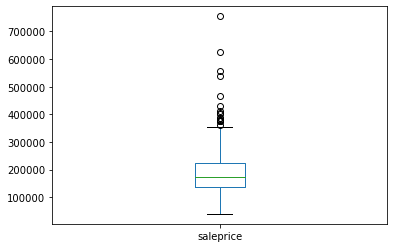

In [33]:
train10.saleprice.plot(kind ='box');

**Most houses** have **no pool**, while of those who have a pool the size is more than **500sq.ft**.

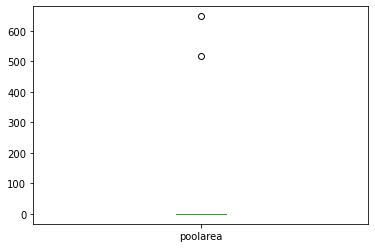

In [34]:
train10.poolarea.plot(kind ='box');

Since only **two houses** have a pool, the column can be **dropped**.

In [35]:
train10.poolarea.value_counts().sort_values()

648      1
519      1
0      736
Name: poolarea, dtype: int64

In [36]:
train11 = train10.drop('poolarea', axis = 1)

In [37]:
train11.head()

,mszoning,lotarea,housestyle,yearbuilt,garagearea,yrsold,saleprice
0,RL,8450,2Story,2003,548,2008,208500
1,RL,9600,1Story,1976,460,2007,181500
2,RL,11250,2Story,2001,608,2008,223500
4,RL,14260,2Story,2000,836,2008,250000
6,RL,10084,1Story,2004,636,2007,307000


Most lots are between **8,410sq.ft and 11,990sq.ft**, while a considerable number of outliers with larger lots exist.

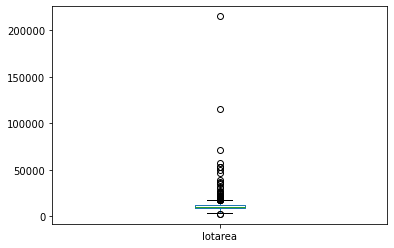

In [38]:
train11.lotarea.plot(kind ='box');

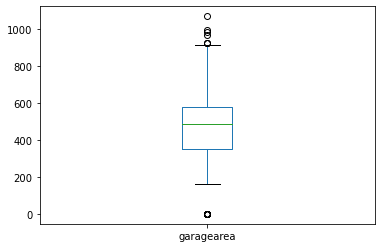

In [39]:
train11.garagearea.plot(kind ='box');

### **3. Data Relations**

From **2006** to **2009**, the number of sales rose, while in 2010 it **declined**. In spite of the populations' decreasing buying power, the financial crisis of **2007/2008**, did not lead to a decline of sales. This might be attributed to foreclosed homes readily turned over in the housing market. In **2010** sales declined. This might be due to a moderation of the housing market following the bubble, or may also suggest an **incomplete dataset**.

In [134]:
no_houses = train11.groupby(['yrsold'])['no_houses'].sum().reset_index()
no_houses

,yrsold,no_houses
0,2006,137
1,2007,162
2,2008,160
3,2009,181
4,2010,98


In [129]:
train11['no_houses'] = 1

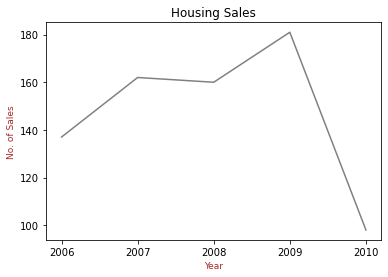

In [137]:
fig, ax = plt.subplots()
x = no_houses['yrsold']
y = no_houses['no_houses']
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('No. of Sales', color="brown",fontsize=9)
ax.set_title('Housing Sales')
ax.plot(x, y, color = 'grey');

Between 2006 and 2010, the average houses sold were around **35 years** old.

In [40]:
train11['age_houses'] = train11['yrsold']-train11['yearbuilt']
train11.head()

,mszoning,lotarea,housestyle,yearbuilt,garagearea,yrsold,saleprice,age_houses
0,RL,8450,2Story,2003,548,2008,208500,5
1,RL,9600,1Story,1976,460,2007,181500,31
2,RL,11250,2Story,2001,608,2008,223500,7
4,RL,14260,2Story,2000,836,2008,250000,8
6,RL,10084,1Story,2004,636,2007,307000,3


In [42]:
train11.age_houses.describe()

count    738.000000
mean      35.174797
std       27.628482
min        0.000000
25%       10.000000
50%       34.000000
75%       51.000000
max      136.000000
Name: age_houses, dtype: float64

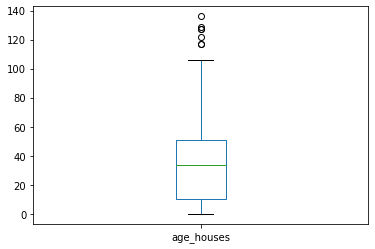

In [41]:
train11.age_houses.plot(kind = 'box');

From 2006 to 2010, **no trend** in the age of houses can be detected.

In [141]:
train11.groupby(['yrsold'])['age_houses'].mean()

yrsold
2006    32.343066
2007    36.222222
2008    35.918750
2009    34.823204
2010    36.836735
Name: age_houses, dtype: float64

While **RL and RM** have the same official specification of a **min. lot area of 6,000sqft** and **no official specifications for a garage** <Link>(https://www.qcode.us/codes/huntingtonbeach/view.php?topic=zoning_code-21-210-210_06), differences between RL and RM can be observed in the data at hand. 
    
Between 2006 and 2010, **RL** sold had a lot area around **11,800sq.ft**, while **RM** were smaller with a lot area of around **7,000 to 8,000 sq.ft**. Whether a house had one or two stories was **not related** with the size of lot area among **RL**. One-story houses of **RM** were around **1,000sq.ft smaller** than two-story houses.  

In [48]:
train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()

<ipython-input-48-26cae33631b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,mszoning,housestyle,lotarea,garagearea,saleprice
0,RL,1Story,11888.0,469.0,173405.0
1,RL,2Story,11779.0,535.0,225103.0
2,RM,1Story,6980.0,344.0,104670.0
3,RM,2Story,8098.0,397.0,139595.0


The average sales price per year for a family house is about **USD 185,000 to USD 190,000**. During the financial crisis in **2008**, there was a **steep decline** in housing prices of around **USD 10,000**. Houses of **smaller size** were sold, while garage size remained the same. In **2009**, the market **recovered** to pre-crisis levels.

In [127]:
trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()
trend.head()

<ipython-input-127-90ce1a1e3a78>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,yrsold,lotarea,garagearea,saleprice
0,2006,12082.0,496.0,193657.0
1,2007,11439.0,483.0,187983.0
2,2008,10412.0,470.0,176574.0
3,2009,12045.0,494.0,188890.0
4,2010,11532.0,466.0,186633.0


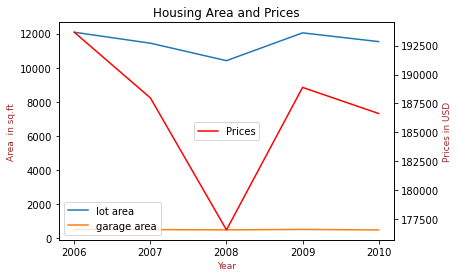

In [128]:
fig, ax = plt.subplots()
x = trend['yrsold']
y1 = trend['lotarea']
y2 = trend['garagearea']
y3 = trend['saleprice']

ax.plot(x, y1, label = 'lot area');
ax.plot(x, y2, label = 'garage area');
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('Area  in sq.ft', color="brown",fontsize=9)
ax.set_title('Housing Area and Prices')
ax.legend(loc = 'lower left')
ax2 = ax.twinx()
ax2.plot(x, y3, color = 'red', label = 'Prices')
ax2.set_ylabel("Prices in USD",color="brown",fontsize=9)
ax2.legend(loc = 10)
plt.show()

In [ ]:
train11['no_houses'] = train11[train11[sale_price].]